<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" />
</div> 

#**MSc in Artificial Intelligence and Machine Learning**
##CS6271 - Evolutionary Algorithms and Humanoid Robotics 2022
### Kaggle Competition


Module Leader: Conor Ryan

Developer: Allan De Lima

## Introduction

The Spaceship Titanic is a Machine Learning competition currently running on Kaggle with the participation of more than 2,000 teams.

As final project in this module, we will run a small competition using a smaller dataset, and you will need to use GP or GE to evolve a solution.

## Description

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Dataset

The dataset provides 12 input variables that are a mixture of categorical, ordinal, boolean and numerical data types:

1. PassengerId
2. HomePlanet
3. CryoSleep
4. Destination
5. Age
6. VIP
7. RoomService
8. FoodCourt
9. ShoppingMall
10. Spa
11. VRDeck
12. Name


This is a binary classification problem where the task is to predict whether a passenger was transported to an alternate dimension. 

### Load the dataset

In [ ]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone the GRAPE repository at first because the dataset to be used is already there.

In [ ]:
import os
# Get the library from our BDS research Group
PATH = '/content/drive/MyDrive/grape/'

# check if 'grape' already exists
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/UL-BDS/grape.git 
    print('Cloning grape in your Drive')

# change directory to 'grape'
%cd /content/drive/MyDrive/grape/

grape directory already exists
/content/drive/MyDrive/grape


### Train set

In [ ]:
train_file = 'datasets/spaceshipTitanic_train.csv'

In [ ]:
# load train set
df_train = pd.read_csv(PATH+train_file)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,Earth,False,55 Cancri e,22,False,0,833,381,0,12,Miranda Pratt,True
1,1,Mars,True,TRAPPIST-1e,61,False,0,0,0,0,0,Isaac Werner,True
2,2,Mars,True,TRAPPIST-1e,5,False,0,0,0,0,0,Elisha Rosario,True
3,3,Earth,False,55 Cancri e,14,False,653,0,4,0,0,Deshawn Hall,False
4,4,Earth,False,PSO J318.5-22,2,False,0,0,0,0,0,Justice Archer,True


In [ ]:
df_train.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,28.555500,213.460500,497.902500,166.237000,342.252000,269.211000
std,577.494589,14.629112,615.762402,1763.257082,509.568841,1236.474773,1021.074852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,499.750000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,999.500000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1499.250000,37.000000,32.000000,61.250000,23.000000,67.250000,37.000000
max,1999.000000,79.000000,6899.000000,27723.000000,10424.000000,18572.000000,14485.000000


In [ ]:
X_train = df_train.copy()
X_train.drop(['Transported'], axis=1, inplace=True)
# warning: cannot drop it more than once

In [ ]:
# class labels
l, _ = X_train.shape

y_train = np.zeros([l,], dtype=bool)

for i in range(l):
  y_train[i] = df_train['Transported'].iloc[i]

In [ ]:
print(y_train[0:5])

[ True  True  True False  True]


### Test set

In [ ]:
test_file = 'datasets/spaceshipTitanic_test.csv'

In [ ]:
# load test set
df_test = pd.read_csv(PATH+test_file)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,2000,Mars,False,TRAPPIST-1e,54,False,676,0,231,379,0,Dawson Knox
1,2001,Mars,False,TRAPPIST-1e,43,False,336,11,796,15,0,Jaylee Navarro
2,2002,Europa,False,55 Cancri e,33,False,77,2381,0,3656,150,Dario Hart
3,2003,Earth,True,55 Cancri e,30,False,0,0,0,0,0,Alden Parker
4,2004,Europa,False,TRAPPIST-1e,31,False,0,53,0,2963,1017,Gina Frank


In [ ]:
df_test.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000,4923.000000
mean,4461.000000,29.028235,231.206175,473.335568,184.646354,308.407678,317.807434
std,1421.292018,14.466997,696.138873,1634.705363,677.528376,1126.346091,1164.989135
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3230.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4461.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5691.500000,38.000000,59.000000,84.000000,31.000000,63.000000,59.500000
max,6922.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,20336.000000


In [ ]:
X_test = df_test.copy()

We need to prepare both training and test datasets before working with a Machine Learning method. 

Consider the following tips:

1.   Remove columns that you think does not influence the class label (for example 'PassengerId');
2.   Use some encoding method with categorical data.

You are free to use any other pre-processing ideas. 

You could use for instance, one-hot encoding with categorical data, as was shown when we studied the heart disease dataset.


Number of categories on each categorical data:



1.   HomePlanet: 3
2.   Destination: 3



In [ ]:
#check whether is there any useless data
train_sums = (X_train==0).astype(int).sum(axis=0)
test_sums = (X_test==0).astype(int).sum(axis=0)
print(train_sums, '\n')
print(test_sums)

PassengerId        1
HomePlanet         0
CryoSleep       1276
Destination        0
Age               53
VIP             1949
RoomService     1348
FoodCourt       1289
ShoppingMall    1343
Spa             1256
VRDeck          1308
Name               0
dtype: int64 

PassengerId        0
HomePlanet         0
CryoSleep       3198
Destination        0
Age               93
VIP             4805
RoomService     3183
FoodCourt       3155
ShoppingMall    3209
Spa             3057
VRDeck          3133
Name               0
dtype: int64


In [ ]:
##This part of code is for changing Age into AgeBin to try improving accuracy
# X_train['AgeBin'] = 7
# for i in range(6):
#     X_train.loc[(X_train.Age >= 10*i) & (X_train.Age < 10*(i + 1)), 'AgeBin'] = i
# X_test['AgeBin'] = 7
# for i in range(6):
#     X_test.loc[(X_test.Age >= 10*i) & (X_test.Age < 10*(i + 1)), 'AgeBin'] = i

In [ ]:
##This part of code is for changing 0 data into the median.
# X_train = X_train.replace(0, np.nan)
# X_test = X_test.replace(0, np.nan)
# X_train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
# X_test.drop(['PassengerId', 'Name'], axis=1, inplace=True)
# LABELS = X_test.columns
# for col in LABELS:
#     if col in ['Age', 'RoomService',
#        'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
#         X_train[col].fillna(X_train[col].median(), inplace=True)
#         X_test[col].fillna(X_test[col].median(), inplace=True)
#     else:
#         X_train[col].fillna(0, inplace=True)
#         X_test[col].fillna(0, inplace=True)
# X_train = pd.get_dummies(X_train, columns=['HomePlanet', 'Destination'])
# X_test = pd.get_dummies(X_test, columns=['HomePlanet', 'Destination'])
# display(X_train.head(100))
# display(X_test.head(100))

In [ ]:
X_train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
X_test.drop(['PassengerId', 'Name'], axis=1, inplace=True)
X_train = pd.get_dummies(X_train, columns=['HomePlanet', 'Destination'])
X_test = pd.get_dummies(X_test, columns=['HomePlanet', 'Destination'])
display(X_train.head(100))
display(X_test.head(100))

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,22,False,0,833,381,0,12,1,0,0,1,0,0
1,True,61,False,0,0,0,0,0,0,0,1,0,0,1
2,True,5,False,0,0,0,0,0,0,0,1,0,0,1
3,False,14,False,653,0,4,0,0,1,0,0,1,0,0
4,False,2,False,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,17,False,0,0,0,0,0,1,0,0,1,0,0
96,False,31,False,1,104,1338,698,126,0,1,0,0,0,1
97,False,13,False,16,0,87,544,0,1,0,0,0,1,0
98,False,37,False,0,0,0,0,0,0,1,0,0,0,1


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,False,54,False,676,0,231,379,0,0,0,1,0,0,1
1,False,43,False,336,11,796,15,0,0,0,1,0,0,1
2,False,33,False,77,2381,0,3656,150,0,1,0,1,0,0
3,True,30,False,0,0,0,0,0,1,0,0,1,0,0
4,False,31,False,0,53,0,2963,1017,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,4,False,0,0,0,0,0,1,0,0,1,0,0
96,True,2,False,0,0,0,0,0,1,0,0,0,0,1
97,False,18,False,0,0,0,391,283,1,0,0,0,1,0
98,False,8,False,0,0,0,0,0,1,0,0,0,0,1


Convert the datasets to NumPy to easily use them.

In [ ]:
# data features
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

## GRAPE

<div>
<img src="https://drive.google.com/uc?export=view&id=1hw43Oi3lGTCkspQ0ged2bZB8q2EpcPhz" width="150"/>
</div> 

GRammatical Algorithms in Python for Evolution (GRAPE)


In [ ]:
!pip install deap==1.3 

import grape
import algorithms

from os import path
from deap import creator, base, tools
import random
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 152 kB 5.8 MB/s 


You can import functions to be used with your grammar from [functions.py](https://github.com/UL-BDS/grape/blob/main/functions.py) on GRAPE repository and / or you can define your own functions.

In [ ]:
from functions import add, sub, mul, pdiv, psqrt, plog, neg, and_, or_, not_, less_than_or_equal, greater_than_or_equal, nand_, nor_

'heartDisease.bnf' is a grammar used for another problem just to check if everything is working well.

Write your own grammar in a text file and save it in your Drive account.

Put the whole address on GRAMMAR_FILE and print to check it.

In [ ]:
GRAMMAR_FILE = 'grammars.bnf' 

f = open("grammars/" + GRAMMAR_FILE, "r") 
print(f.read())
f.close() 


<log_op> ::= <conditional_branches> | and_(<log_op>,<log_op>) | or_(<log_op>,<log_op>) | not_(<log_op>) | <bool>
<conditional_branches> ::= less_than_or_equal(<num_op>,<num_op>) | greater_than_or_equal(<num_op>, <num_op>)
<num_op>   ::= add(<num_op>,<num_op>) | sub(<num_op>,<num_op>) | mul(<num_op>,<num_op>) | pdiv(<num_op>,<num_op>) | <no_bool>
<bool> ::=   x[0]|x[2]|x[8]|x[9]|x[10]|x[11]|x[12]|x[13]
<no_bool> ::=   x[1]|x[3]|x[4]|x[5]|x[6]|x[7]|<c><c>.<c><c>
<c>  ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9


Run the following cell to put your grammar on the class Grammar.

In [ ]:
BNF_GRAMMAR = grape.Grammar(path.join("grammars", GRAMMAR_FILE))

The fitness function is the percentage of outputs wrongly predicted.

You can use any other fitness function, but you need to maintain the comma at the end of the returning lines.

In this notebook, GRAPE is being used only for minimisation, so the fitness function needs to consider it. If you want to maximise, you also need to change the weights in the toolbox.

Moreover, this fitness functions considers the predicted output as True or False. If your grammar allow individuals with other outputs, you need to change the fitness function.

In [ ]:
def mae(y, yhat):
    """
    Calculate mean absolute error between inputs.

    :param y: The expected input (i.e. from dataset).
    :param yhat: The given input (i.e. from phenotype).
    :return: The mean absolute error.
    """
    
    compare = np.equal(y,yhat)

    return 1 - np.mean(compare)
def fitness_eval(individual, points):
    """
    Fitness Function
    """

    x = points[0]
    Y = points[1]
    
    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)

    try:
        Y_class = [1 if pred[i] > 0 else 0 for i in range(len(Y))]
    except (IndexError, TypeError):
        return np.NaN,
    fitness = mae(Y, Y_class)
   
    return fitness,

To use properly the fitness function above with GRAPE, the features must be in the lines, and the samples must be in the columns, so if your data is not like that, you need to transpose the matrix.

Take a look at the print. If you run this cell two times, the matrix will be transposed again and will not work properly.

In [ ]:
X_train = np.transpose(X_train)
X_test = np.transpose(X_test) 

print('Training (X,Y):\t', X_train.shape, y_train.shape)
print('Test (X):\t', X_test.shape)

Training (X,Y):	 (14, 2000) (2000,)
Test (X):	 (14, 4923)


Set the Grammatical Evolution parameters.

In [ ]:
POPULATION_SIZE = 2000
MAX_GENERATIONS = 60
P_CROSSOVER = 0.72
P_MUTATION = 0.01
ELITE_SIZE = round(0.01*POPULATION_SIZE)
HALL_OF_FAME_SIZE = round(0.01*POPULATION_SIZE)

TOURNAMENT_SIZE = 20
RANDOM_SEED = 94188
random.seed(RANDOM_SEED) 


CODON_CONSUMPTION = 'lazy'
GENOME_REPRESENTATION = 'list'
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 13
MIN_INIT_TREE_DEPTH = 3
MAX_TREE_DEPTH = 100
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test',
                'best_ind_length', 'avg_length', 
                'best_ind_nodes', 'avg_nodes', 
                'best_ind_depth', 'avg_depth', 
                'avg_used_codons', 'best_ind_used_codons', 
                'structural_diversity', 'fitness_diversity',
                'selection_time', 'generation_time']

Create a toolbox.

In [ ]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)

toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual) 

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)

# Single-point crossover:
toolbox.register("mate", grape.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", grape.mutation_int_flip_per_codon)

In [ ]:
# create initial population (generation 0):
population = toolbox.populationCreator(pop_size=POPULATION_SIZE, 
                                           bnf_grammar=BNF_GRAMMAR, 
                                           min_init_depth=MIN_INIT_TREE_DEPTH,
                                           max_init_depth=MAX_INIT_TREE_DEPTH,
                                           codon_size=CODON_SIZE,
                                           codon_consumption=CODON_CONSUMPTION,
                                           genome_representation=GENOME_REPRESENTATION
                                            )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

Run Grammatical Evolution.

In [ ]:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                              bnf_grammar=BNF_GRAMMAR, 
                                              codon_size=CODON_SIZE, 
                                              max_tree_depth=MAX_TREE_DEPTH,
                                              max_genome_length=MAX_GENOME_LENGTH,
                                              points_train=[X_train, y_train], 
                                              codon_consumption=CODON_CONSUMPTION,
                                              report_items=REPORT_ITEMS,
                                              genome_representation=GENOME_REPRESENTATION,                                              
                                              stats=stats, halloffame=hof, verbose=False)

gen = 0 , Best fitness = (0.25649999999999995,)
gen = 1 , Best fitness = (0.22850000000000004,) , Number of invalids = 704
gen = 2 , Best fitness = (0.22850000000000004,) , Number of invalids = 779
gen = 3 , Best fitness = (0.21299999999999997,) , Number of invalids = 840
gen = 4 , Best fitness = (0.21299999999999997,) , Number of invalids = 872
gen = 5 , Best fitness = (0.21299999999999997,) , Number of invalids = 892
gen = 6 , Best fitness = (0.21299999999999997,) , Number of invalids = 888
gen = 7 , Best fitness = (0.21299999999999997,) , Number of invalids = 908
gen = 8 , Best fitness = (0.21299999999999997,) , Number of invalids = 939
gen = 9 , Best fitness = (0.21299999999999997,) , Number of invalids = 978
gen = 10 , Best fitness = (0.20950000000000002,) , Number of invalids = 1015
gen = 11 , Best fitness = (0.20950000000000002,) , Number of invalids = 1045
gen = 12 , Best fitness = (0.20950000000000002,) , Number of invalids = 1040
gen = 13 , Best fitness = (0.20950000000000002

Show the best individual as an expression.

In [ ]:
# Best individual
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])
print("Depth: ", hof.items[0].depth)
print("Length of the genome: ", len(hof.items[0].genome))
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')

Best individual: 
 not_(not_(not_(less_than_or_equal(add(add(add(pdiv(x[4],add(add(sub(sub(sub(x[7]
,x[5]),add(x[6],pdiv(x[1],x[6]))),sub(x[1],x[4])),add(add(x[4],x[7]),x[7])),add(
x[6],pdiv(x[1],x[3])))),x[6]),pdiv(sub(x[3],x[4]),x[7])),add(add(sub(sub(sub(x[4
],x[7]),add(x[6],x[6])),add(x[3],x[4])),x[7]),add(add(sub(sub(sub(x[4],x[7]),add
(x[6],pdiv(x[1],x[1]))),x[6]),pdiv(sub(x[3],x[6]),x[7])),add(add(sub(sub(sub(x[4
],x[7]),add(x[6],x[6])),add(x[3],x[7])),x[1]),add(pdiv(x[3],mul(add(pdiv(x[1],x[
3]),x[1]),x[1])),add(add(sub(sub(sub(x[4],x[7]),add(x[6],x[6])),add(x[3],x[6])),
pdiv(sub(mul(pdiv(x[1],mul(x[1],sub(x[5],x[5]))),x[4]),x[5]),sub(add(x[5],x[7]),
sub(x[5],x[1])))),x[5])))))),x[4]))))

Training Fitness:  0.1995
Depth:  21
Length of the genome:  230
Used portion of the genome: 0.85


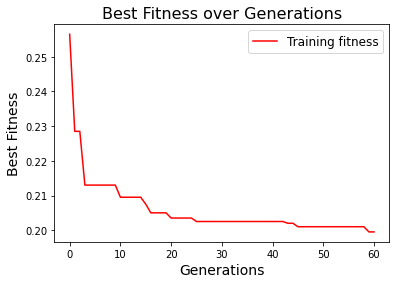

In [ ]:
gen, invalid = logbook.select("gen", "invalid")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
plt.plot(gen, min_fitness_values, color='red', label="Training fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.show()

Define a function to predict values.

In [ ]:
def predict(individual, X):
    x = X
    
    if individual.invalid == True:
        return np.NaN,

    # Evaluate the expression
    try:
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,
    assert np.isrealobj(pred)
    
    _, c = x.shape
    
    try:
        Y_class = [True if pred[i] > 0 else False for i in range(c)]
    except (IndexError, TypeError):
        return np.NaN,
   
    return Y_class

Predict the classes of the test set.

In [ ]:
y_pred = predict(hof.items[0], X_test)
for i in range(len(y_pred)):
  y_pred[i] = str(y_pred[i]).upper()
print("Predicted classes of the test set: ", y_pred)

Predicted classes of the test set:  ['FALSE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'TRUE', 'TRUE', 'FALSE', 'FALSE', 'TRUE', 'FALSE', 'FALSE', 'FALSE', 'TRUE', 'TRUE', 'TRUE', 'FALSE', 'TRUE',

Save it in a .csv file and submit it in the Kaggle competition.

The format is as follows:
1. First column is the original `PassengerId` column in the test set;
2. Second column is named `Transported` and contains the predictions (only 0's or 1's).

In [ ]:
df_id = df_test['PassengerId']
df_class = pd.DataFrame(data=y_pred, columns = ['Transported'])
df_pred = pd.concat([df_id, df_class], axis=1)

df_pred.to_csv('predictions.csv', sep=',', index=False)

## Summary



After 60 generations, we could get best result whose fitness was under 0.2. Although the score in Kaggle was still need to be improved because there are some problems such as overfit, but we believe that we can get a better result with keeping working.




